# Выбор локации для скважины

## Загрузка и подготовка данных

In [34]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [35]:
# загружаем датасеты
df_1 = pd.read_csv('/datasets/geo_data_0.csv')
df_2 = pd.read_csv('/datasets/geo_data_1.csv')
df_3 = pd.read_csv('/datasets/geo_data_2.csv')

In [36]:
# создадим функцию, которая покажет всю общую информацию о датасете
def show_info(df_name):  
    display(df_name.head(10))
    print('-------------------------------------------')
    print(df_name.info())
    print('-------------------------------------------')
    print(df_name.describe())
    print('-------------------------------------------')
    df_name.hist(figsize=(15, 20));

Теперь изучим датасеты детально

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


-------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
-------------------------------------------
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%        

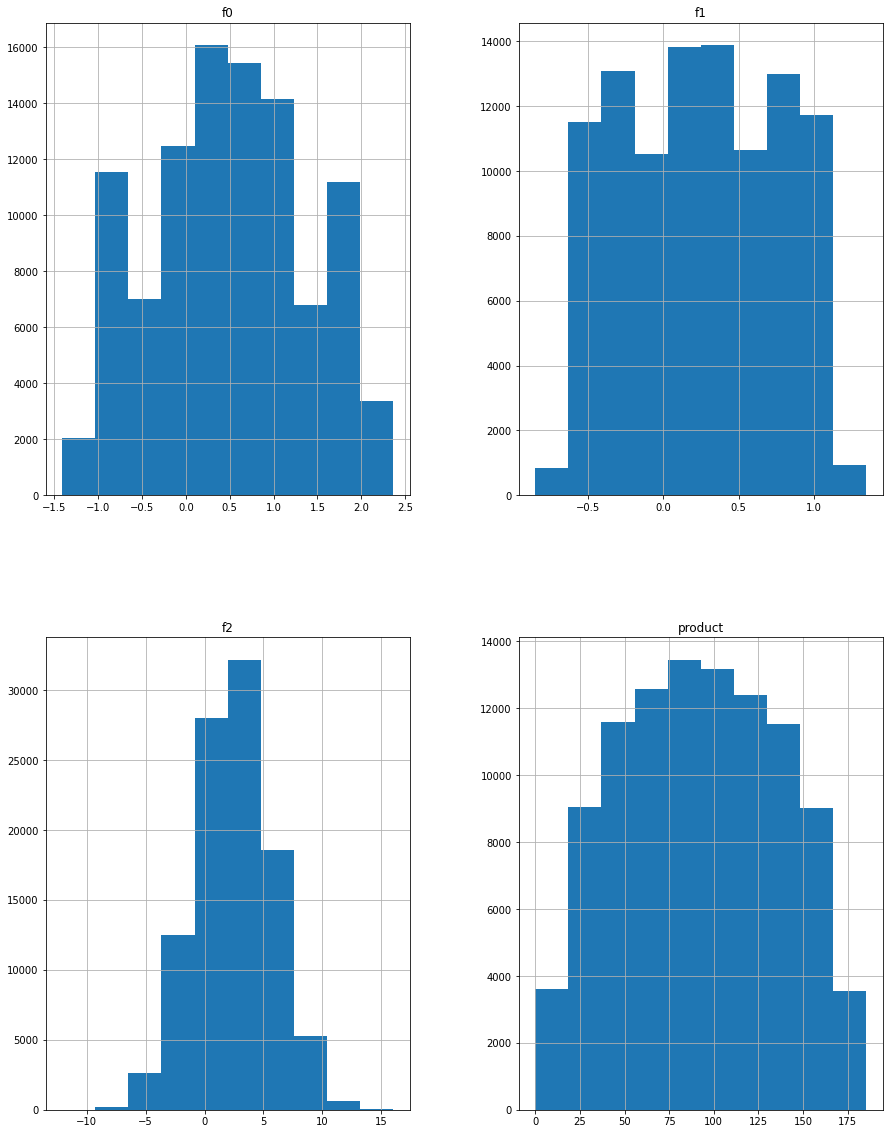

In [37]:
show_info(df_1)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


-------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
-------------------------------------------
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%        

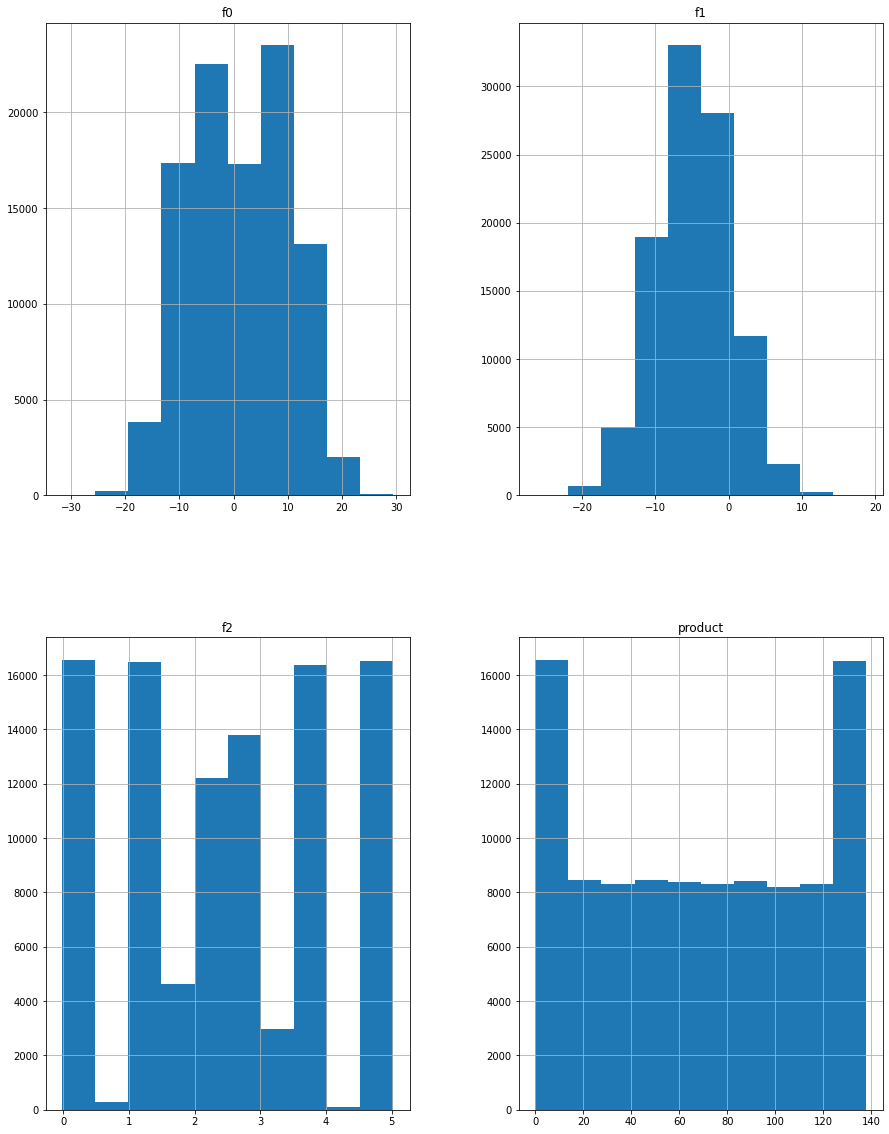

In [38]:
show_info(df_2)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


-------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
-------------------------------------------
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%        

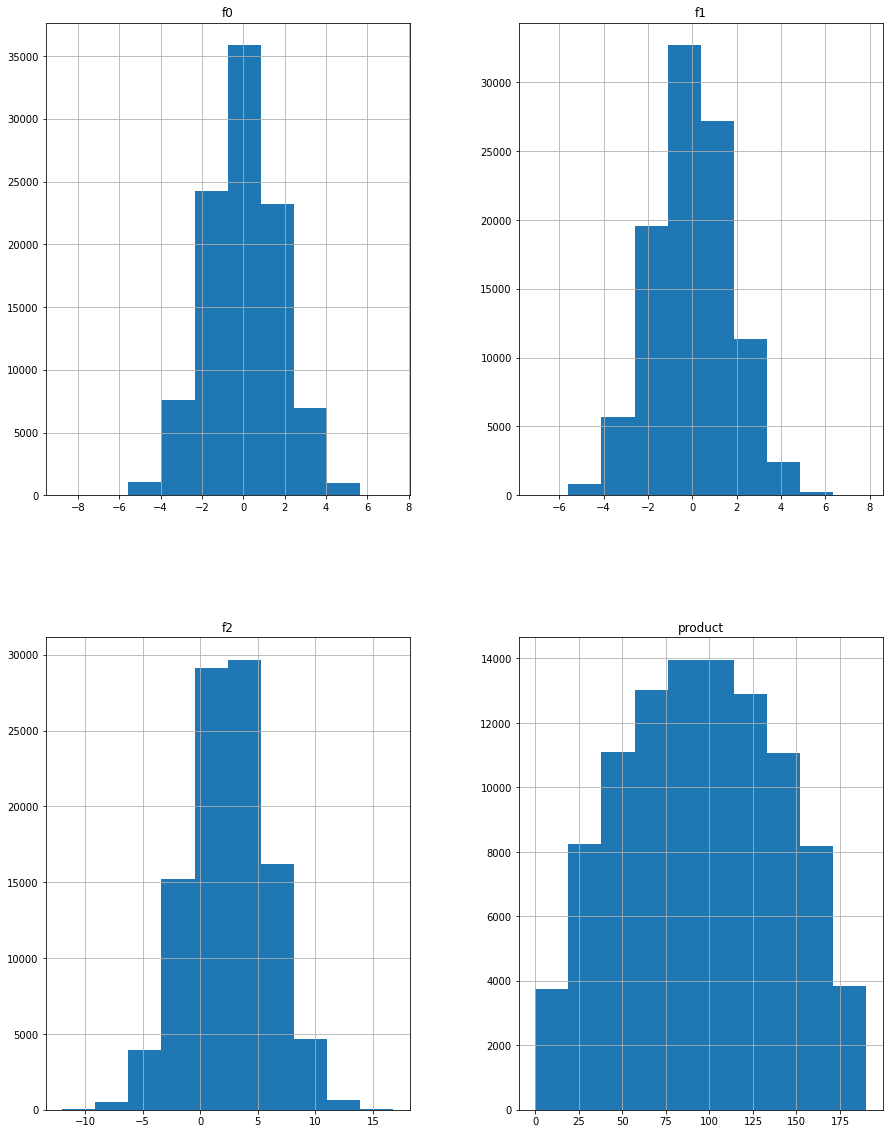

In [39]:
show_info(df_3)

In [40]:
# проверим наличие дубликатов
print('Количество дубликатов в первом датасете:', df_1.duplicated().sum())
print('Количество дубликатов во втором датасете:', df_2.duplicated().sum())
print('Количество дубликатов в третьем датасете:', df_3.duplicated().sum())

Количество дубликатов в первом датасете: 0
Количество дубликатов во втором датасете: 0
Количество дубликатов в третьем датасете: 0


**Вывод:**</b>  
Нам даны три датасета из 5 столбцов и 100000 строк каждый. Датасеты можно считать чистыми. В них нет пропусков, нет дублей, типы данных корректны. Данные в столбце `product` (объём запасов в скважине) в первом и третьем датасете имеют вид нормального распределения, если судить по графикам. Во втором датасете иная картина. График равномерен, но только в начале и в конце есть всплески. Интересное наблюдение. Но посмотрим как оно скажеться при оценке регионов добычи нефти или нет.

## Обучение и проверка модели

Обучим и проверим модель для каждого региона:</b>  

 - Разобьём данные на обучающую и валидационную выборки в соотношении 75:25.
 - Обучим модель и сделаем предсказания на валидационной выборке.
 - Сохраним предсказания и правильные ответы на валидационной выборке.
 - Напечатаем на экране средний запас предсказанного сырья и RMSE модели.
 - Проанализируем результаты.

После загрузки и проверки данных теперь мы можем приступить к созданию модели. Для начала создадим множества: обучающие и тестовые.

In [41]:
features = ['f0', 'f1', 'f2']
target = ['product']
features_1 = df_1[features]
target_1 = df_1[target]
features_2 = df_2[features]
target_2 = df_2[target]
features_3 = df_3[features]
target_3 = df_3[target]

Создадим функцию для обучения модели, расчёта среднего запаса и RMSE модели

In [42]:
def model_linreg(features, target):
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, 
                                                                                  test_size=0.25, 
                                                                                  random_state=25)
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    predictions_valid_mean = predictions_valid.mean()
    rmse = mean_squared_error(target_valid, predictions_valid) ** 0.5
    print('Средний запас предсказанного сырья:', predictions_valid_mean)
    print('RMSE модели:', rmse)
    return target_valid, predictions_valid

Построим модель и найдем значения для первого региона (датасета)

In [43]:
target_1_valid, predictions_1 = model_linreg(features_1, target_1)

Средний запас предсказанного сырья: 92.65108756805346
RMSE модели: 37.65053057971891


Построим модель и найдем значения для второго региона (датасета)

In [44]:
target_2_valid, predictions_2 = model_linreg(features_2, target_2)

Средний запас предсказанного сырья: 69.27401526922849
RMSE модели: 0.8892646983510678


Построим модель и найдем значения для третьего региона (датасета)

In [45]:
target_3_valid, predictions_3 = model_linreg(features_3, target_3)

Средний запас предсказанного сырья: 94.90290511535086
RMSE модели: 40.08029177014584


In [46]:
# сведем результаты в общую таблицу
resultats = pd.DataFrame([('Средний запас предсказанного сырья', '92.65', '69.27', '94.90'),
                   ('RMSE', '37.6505', '0.8892', '40.0803')],
                    columns=('Показатель', 'Регион 1', 'Регион 2', 'Регион 3'))

In [47]:
display(resultats)

,Показатель,Регион 1,Регион 2,Регион 3
0,Средний запас предсказанного сырья,92.65,69.27,94.90
1,RMSE,37.6505,0.8892,40.0803


**Вывод:**</b>  
В первом и третьем регионах (датасетах) высокое значение запаса предсказанного сырья. Однако также высокое значение у RMSE. Это говорит о невысокой точности модели и ее прогноза. По второму региону модель предсказывает значительно меньший (практически на 30%) запас сырья, но RMSE гораздо меньше. Это, наоборот, говорит о высокой точности и предсказании модели на основе данных из второго датасета.

## Подготовка к расчёту прибыли

Подготовим все к расчёту прибыли:</b>  

 - ключевые значения для расчётов сохраним в отдельных переменных.
 - рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе.
 - напишем выводы по этапу подготовки расчёта прибыли.

In [48]:
# в соответствии с требованиями и условиями задачи создадим переменные

BUDGET = 10_000_000_000 # бюджет на разработку скважин в регионе 10 млрд рублей

TOP_POINTS = 200 # при разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших 

POINTS = 500 # для разработки исследуют 500 точек

PRODUCT = 450000 # один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

In [49]:
# найдем достаточный объёма сырья для безубыточной разработки новой скважины

min_product = BUDGET / (TOP_POINTS * PRODUCT)

print('Достаточный объём сырья для безубыточной разработки новой скважины:', min_product)

Достаточный объём сырья для безубыточной разработки новой скважины: 111.11111111111111


**Вывод:**</b>  
Мы создали необходимые переменные для расчета прибыли. Нашли достаточный объем сырья для безубыточной разработки новой скважины - 111.11 тыс. баррелей. Данный показатель превышает все среднине запасы предсказанного сырья во всех трех регионах.

## Расчёт прибыли и рисков 

### Расчёт прибыли

Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:</b>  

 - Выберем скважины с максимальными значениями предсказаний.
 - Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям.
 - Рассчитаем прибыль для полученного объёма сырья.

In [50]:
# преобразуем полученые при создании модели выборки в pd.Series()
target_1_valid = pd.Series(target_1_valid['product']).reset_index(drop=True)
target_2_valid = pd.Series(target_2_valid['product']).reset_index(drop=True)
target_3_valid = pd.Series(target_3_valid['product']).reset_index(drop=True)

In [51]:
# аналогично преобразуем оценки в pd.Series()
predictions_1 = pd.Series(*predictions_1.reshape(1,-1))
predictions_2 = pd.Series(*predictions_2.reshape(1,-1))
predictions_3 = pd.Series(*predictions_3.reshape(1,-1))

In [52]:
# теперь мы можем создать функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели

def profit(predictions, target):
    top_predictions = predictions.sort_values(ascending=False)
    top_targets = target[top_predictions.index][:TOP_POINTS]
    return sum(top_targets) * PRODUCT - BUDGET

In [53]:
# далее мы можем найти прибыль каждого региона
print('Прибыль региона 1 равна:', round(profit(predictions_1, target_1_valid), 2))
print('Прибыль региона 2 равна:', round(profit(predictions_2, target_2_valid), 2))
print('Прибыль региона 3 равна:', round(profit(predictions_3, target_3_valid), 2))

Прибыль региона 1 равна: 3277281153.65
Прибыль региона 2 равна: 2415086696.68
Прибыль региона 3 равна: 2463520418.46


**Вывод:**</b>  
Мы рассчитали прибыль по выбранным скважинам и предсказаниям модели. Больше всего прибыли, пока что без учета рисков и определения доверительного интервала, сулит добыча в первом регионе.

### Расчёт рисков

Посчитаем риски и прибыль для каждого региона:</b>  

 - применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
 - найдём среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
 - напишем выводы: предложим регион для разработки скважин и обоснуем выбор.

In [54]:
# создадим функцию для расчёта рисков, прибыли и доверительных интервалов для каждого региона

state = np.random.RandomState(25)

def risk_func(predictions, target):
    values = []
    for i in range(1000):
        target_sample = target.sample(n=POINTS, replace=True, random_state=state)
        predictions_sample = predictions[target_sample.index]
        values.append(profit(predictions_sample, target_sample))
        
    values = pd.Series(values)    
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    values_mean = values.mean()
    risk = st.percentileofscore(values, 0)
    print('Средняя прибыль:', values.mean())
    print('Процент риска:', risk)
    
    return lower, upper

In [55]:
# найдем прибыль и риск для первого региона
risk_func(predictions_1, target_1_valid)

Средняя прибыль: 404995754.9811105
Процент риска: 5.9


(-95993128.11273298, 895135856.4339616)

In [56]:
# найдем прибыль и риск для второго региона
risk_func(predictions_2, target_2_valid)

Средняя прибыль: 552995239.319135
Процент риска: 0.1


(135196907.45805246, 987155797.088747)

In [57]:
# найдем прибыль и риск для третьего региона
risk_func(predictions_3, target_3_valid)

Средняя прибыль: 373231100.8405585
Процент риска: 8.9


(-167832534.9224042, 909867606.7028856)

In [58]:
# сведем результаты в общую таблицу
total = pd.DataFrame([('Средняя прибыль', '404995754.98', '552995239.32', '373231100.84'),
                   ('Процент риска:', '5.9', '0.1', '8.9')],
                    columns=('Показатель', 'Регион 1', 'Регион 2', 'Регион 3'))

In [59]:
display(total)

,Показатель,Регион 1,Регион 2,Регион 3
0,Средняя прибыль,404995754.98,552995239.32,373231100.84
1,Процент риска:,5.9,0.1,8.9


**Вывод:**</b>  
Согласно полученным результатам для разработки лучше подойдет 2-ой регион. Добыча там предполагает получение максимальной прибыли, из всех трех регионов, равной - 552 млн., при меньшем проценте риска равному - 0,1%.

## Общий вывод

1. Нам были даны три датасета из 5 столбцов и 100000 строк каждый. В датасетах нет пропусков, нет дублей, типы данных корректны. Данные в столбце product (объём запасов в скважине) в первом и третьем датасете имеют вид нормального распределения, если судить по графикам. Во втором датасете иная картина. График равномерен, но только в начале и в конце есть всплески. Т.е. во втором регионе практически все скважины имеют стабильно высокий средний уровень запасов.</b> 
2. В первом и третьем регионах (датасетах) высокое значение запаса предсказанного сырья. Однако также высокое значение у RMSE. Это говорит о невысокой точности модели и ее прогноза. По второму региону модель предсказывает значительно меньший (практически на 30%) запас сырья, но RMSE гораздо меньше. Это, наоборот, говорит о высокой точности и предсказании модели на основе данных из второго датасета.</b> 
3. Мы установили значения средней прибыли и процентов риска. И 2-ой регион показал лучший результат по этим показателям. Средняя прибыль более - 552 млн., при меньшем проценте риска равном - 0,1%.</b>  

**Основываясь на выше сказанном к разработке рекомендуется 2-ой регион.**

